## A kernel for price prediction using Nifty5Y Dataset

### Authors:
Anshul Pinto <br/>
Ayush Kumar <br/>

In [1]:
# Importing all required libraries

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time 
import math
import keras

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../input/nifty5Y.csv',delimiter= ',')
df=df.set_index(['Date'])
#df.drop(df.columns[[5,6,7,9]],axis=1,inplace=True)
df.drop(df.columns[[0,1,2,3]],axis=1, inplace=True)
df.head(5)

,Adj Close,Volume,Next day
Date,,,
2013-06-07,5881.000000,118300.0,5878.000000
2013-06-10,5878.000000,100100.0,5788.799805
2013-06-11,5788.799805,180900.0,5760.200195
2013-06-12,5760.200195,140400.0,5699.100098
2013-06-13,5699.100098,142000.0,5808.399902


In [3]:
df.describe()

,Adj Close,Volume,Next day
count,1223.000000,1223.000000,1223.000000
mean,8254.863455,183172.444808,8258.859367
std,1373.142920,58884.400479,1373.339898
min,5285.000000,0.000000,5285.000000
25%,7568.024902,146000.000000,7568.424805
50%,8246.849609,172800.000000,8248.250000
75%,9013.350097,207100.000000,9037.825195
max,11130.400391,610300.000000,11130.400391


In [4]:
df.fillna(0)
df.info()
df.columns = ['Close','Volume','Next_day']

<class 'pandas.core.frame.DataFrame'>
Index: 1224 entries, 2013-06-07 to 2018-06-06
Data columns (total 3 columns):
Adj Close    1223 non-null float64
Volume       1223 non-null float64
Next day     1223 non-null float64
dtypes: float64(3)
memory usage: 38.2+ KB


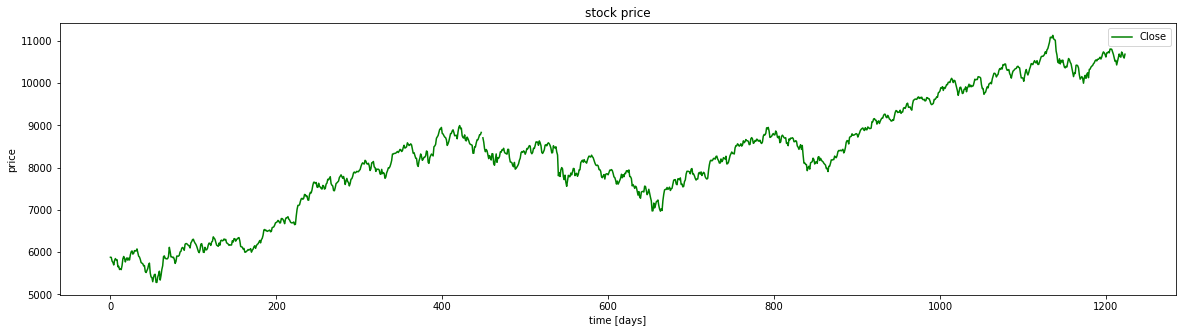

In [5]:
plt.figure(figsize=(20, 5))
plt.subplot(1,1,1)
plt.plot(df.Close.values,color='green',label='Close')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

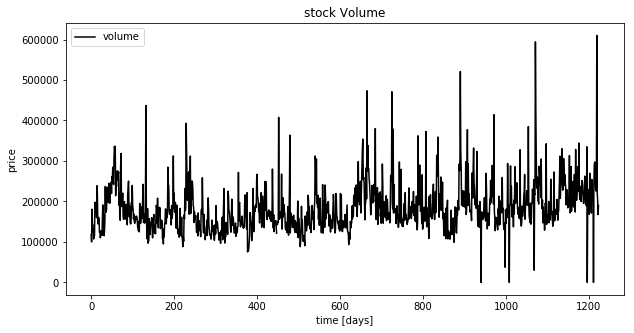

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(1,1,1)
plt.plot(df.Volume.values,color='black',label='volume')
plt.title('stock Volume')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()


In [7]:
#we have empty values for prices on certain days and volume on certain days in 0, these rows will be deleted 
df = df[np.isfinite(df['Close'])]
df = df[np.isfinite(df['Volume'])]
df = df[np.isfinite(df['Next_day'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1222 entries, 2013-06-07 to 2018-06-06
Data columns (total 3 columns):
Close       1222 non-null float64
Volume      1222 non-null float64
Next_day    1222 non-null float64
dtypes: float64(3)
memory usage: 38.2+ KB


In [8]:

df1=df
df.head()
#df1
scaler = StandardScaler()
#df1 = scaler.fit_transform(df1)
#df1[0:5]
#df = df.values

In [9]:
#splitting data ito 80:20 split for training and testing

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, shuffle = False)

train_scale = scaler.fit_transform(train)
test_scale = scaler.fit_transform(test)
#train , test = train_scale.values , test_scale.values

In [10]:
def create(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0:2]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 2])
    return np.array(dataX), np.array(dataY)

In [11]:
look_back = 20
trainx, trainy = create(train_scale,look_back)
testx, testy = create(test_scale, look_back)

np.shape(trainx)

(956, 20, 2)

In [12]:
model = Sequential()
model.add(LSTM(16, input_shape=(look_back, 2),return_sequences = True))
model.add(LSTM(4))
model.add(Dropout(0.25))
model.add(Dense(1))
adm = keras.optimizers.Adam(lr = 0.008)
model.compile(loss='mean_squared_error', optimizer=adm, metrics = ['accuracy'])
history = model.fit(trainx, trainy, epochs=50, batch_size=8, verbose=1, validation_data = (testx,testy) )

Train on 956 samples, validate on 224 samples
Epoch 1/50
956/956 [==============================] - 9s 10ms/step - loss: 0.1925 - acc: 0.0000e+00 - val_loss: 0.2108 - val_acc: 0.0000e+00
Epoch 2/50
956/956 [==============================] - 7s 7ms/step - loss: 0.1080 - acc: 0.0000e+00 - val_loss: 0.1652 - val_acc: 0.0000e+00
Epoch 3/50
956/956 [==============================] - 7s 7ms/step - loss: 0.1054 - acc: 0.0000e+00 - val_loss: 0.1468 - val_acc: 0.0000e+00
Epoch 4/50
956/956 [==============================] - 7s 7ms/step - loss: 0.1169 - acc: 0.0000e+00 - val_loss: 0.1425 - val_acc: 0.0000e+00
Epoch 5/50
956/956 [==============================] - 7s 8ms/step - loss: 0.1033 - acc: 0.0000e+00 - val_loss: 0.1417 - val_acc: 0.0000e+00
Epoch 6/50
956/956 [==============================] - 8s 8ms/step - loss: 0.0999 - acc: 0.0000e+00 - val_loss: 0.1454 - val_acc: 0.0000e+00
Epoch 7/50
956/956 [==============================] - 7s 8ms/step - loss: 0.0907 - acc: 0.0000e+00 - val_loss: 0.

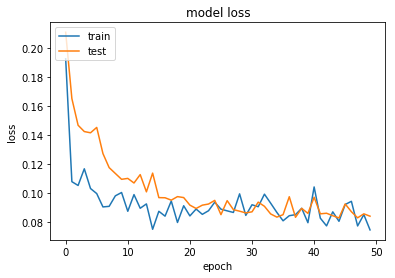

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
train_preds = model.predict(trainx)

In [15]:
test_preds = model.predict(testx)

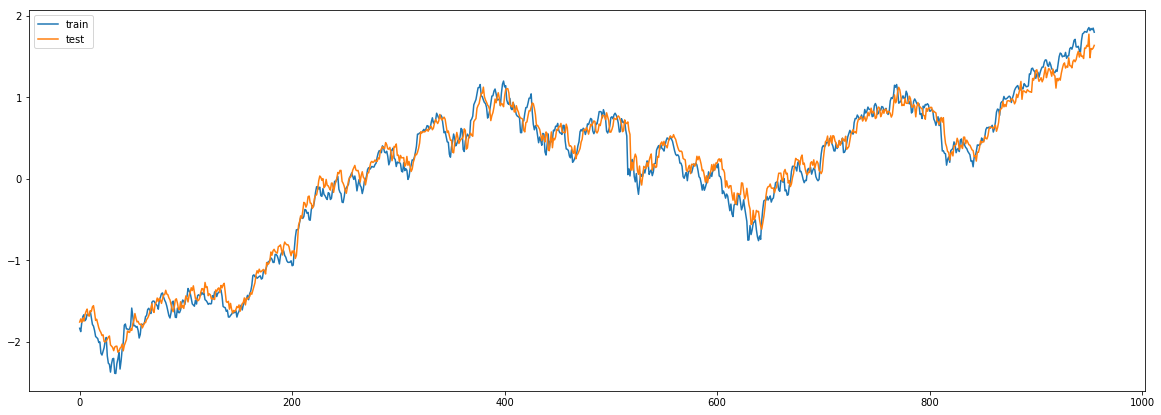

In [16]:
plt.figure(figsize=(20, 7))
plt.plot(train_scale[look_back + 1:][:,2])
plt.plot(train_preds)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

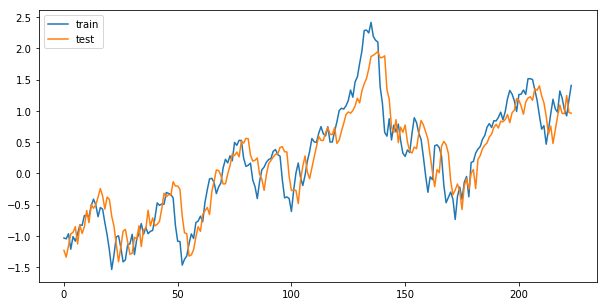

In [17]:
plt.figure(figsize =(10,5))
plt.plot(test_scale[look_back +1:][:,2])
plt.plot(test_preds)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
df = df.values
for i in range (len(df)):
    if df[i][2]>df[i][0]:
        df[i][2] = 1
    else:
        df[i][2] = 0

In [19]:
df[0:5]
dftrain , dftest = train_test_split(df, test_size=0.2, shuffle = False)



In [20]:
Xtrain , Ytrain = dftrain[: , 0:2] , dftrain[: , 2]
Xtest , Ytest = dftest[:, 0:2], dftest[:, 2]

np.shape(Xtrain)

(977, 2)

In [21]:
def create2(datasetx,datasety, look_back):
    dataX, dataY = [], []
    for i in range(len(datasetx)-look_back-1):
        a = datasetx[i:(i+look_back), 0:2]
        dataX.append(a)
        dataY.append(datasety[i + look_back])
    return np.array(dataX), np.array(dataY)

In [22]:


Xtrain_scale  = scaler.fit_transform(Xtrain) 
Xtest_scale = scaler.fit_transform(Xtest)

Xtrain , Ytrain = create2(Xtrain_scale, Ytrain , look_back)
Xtest , Ytest = create2(Xtest_scale, Ytest , look_back)



In [23]:
#model for classification

model2 = Sequential()
model2.add(LSTM(16, input_shape=(look_back, 2)))
#model2.add(LSTM(4))
model2.add(Dropout(0.2))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))
adm = keras.optimizers.Adam(lr = 0.1)
model2.compile(loss='mean_squared_error', optimizer=adm, metrics = ['accuracy'])
history2 = model2.fit(Xtrain, Ytrain, epochs=50, batch_size=8, verbose=1, validation_data = (Xtest,Ytest) )

Train on 956 samples, validate on 224 samples
Epoch 1/50
956/956 [==============================] - 5s 5ms/step - loss: 0.2685 - acc: 0.4895 - val_loss: 0.2484 - val_acc: 0.5268
Epoch 2/50
956/956 [==============================] - 4s 4ms/step - loss: 0.2588 - acc: 0.5314 - val_loss: 0.2474 - val_acc: 0.5312
Epoch 3/50
956/956 [==============================] - 4s 4ms/step - loss: 0.2530 - acc: 0.5167 - val_loss: 0.2458 - val_acc: 0.5446
Epoch 4/50
956/956 [==============================] - 4s 4ms/step - loss: 0.2544 - acc: 0.5146 - val_loss: 0.2514 - val_acc: 0.5223
Epoch 5/50
956/956 [==============================] - 4s 4ms/step - loss: 0.2533 - acc: 0.5084 - val_loss: 0.2476 - val_acc: 0.5446
Epoch 6/50
956/956 [==============================] - 4s 4ms/step - loss: 0.2514 - acc: 0.5199 - val_loss: 0.2499 - val_acc: 0.5446
Epoch 7/50
956/956 [==============================] - 4s 4ms/step - loss: 0.2527 - acc: 0.5021 - val_loss: 0.2474 - val_acc: 0.5446
Epoch 8/50
956/956 [==========